In [1]:
class task_checkker():
    
    def __init__(self, logging=False,):
        self.score = {}
        self.logging=logging

    def estimate(self, num_task, points = 0, comment = "All right!"):        

        self.score[f"task_{num_task}"] = {"comment": comment, "score": points}
        if self.logging:
            key = f"task_{num_task}"
            print("{0:7} || {1:0} || {2:1}".format(key, float(self.score[key]["score"]), self.score[key]["comment"]))
            
    def result(self):
        print("{0:13} {1:1}   {2}".format('task #', 'points', 'comment'))
        print("{0:13} {1:1}  {2}".format("="*12, "="*7, "="*12))
        for key in self.score.keys():
            print("{0:13} || {1:0}   || {2:1}".format(key, float(self.score[key]["score"]), self.score[key]["comment"]))

        print("============")
        print("TOTAL SCORE: ", sum(list([i["score"] for i in self.score.values()])))
        print("Score input in RS App:", sum([i["score"] for i in self.score.values()]) * 10)


In [2]:
task = task_checkker(True)

Каждый пункт, который предлагается выполнить в рамках домашнего задания, имеет объявленную "цену" в баллах. Максимально возможная сумма – 10 баллов, а с учётом бонусных пунктов – 12 баллов. Выполнять все пункты не обязательно, можно сделать только часть. В большинстве пунктов ожидается, что вы напишете работающий код на Python; иногда надо будет писать комментарии в свободной форме – например, сравнивать несколько подходов к решению одной задачи. Там, где оставлены пустые клетки под ваши ответы, вы можете по своему усмотрению добавлять ещё клетки.

* * *

Эта лабораторная работа посвящена кластеризации. Мы будем работать с рукописными изображениями цифр, научимся их кластеризовать двумя разными методами (иерархическая кластеризация и алгоритм $K$-means), оценивать качество разбиения и выбирать оптимальное число кластеров, а также визуализировать промежуточные результаты.

---

# 1. Получение данных

Данные, с которыми мы будем работать, доступны в библиотеке scikit-learn (модуль называется `sklearn`) в подмодуле `datasets` через функцию, которая называется `load_digits`. Всего имеется 1797 наблюдений, каждое из них представляет чёрно-белую картинку 8 $\times$ 8 пикселей. Эти картинки – распознанные рукописные цифры от 0 до 9. Образцов написания каждой цифры дано приблизительно поровну, около 180.

Для удобства использования данных каждая картинка "развёрнута" в строку, так что NumPy-массив, в котором хранятся данные, имеет размерность 2 и величину 1797 $\times$ 64 (а не, например, размерность 3 и величину 1797 $\times$ 8 $\times$ 8). Интенсивность цвета в каждом пикселе кодируется целым числом от 0 до 16.

Кроме наблюдений (картинок), известны соответствующие им значения целевой переменной: какую цифру на самом деле изображает каждая картинка. Мы могли бы сразу сформулировать задачу обучения с учителем и предсказывать цифры по картинкам, но для целей этой лабораторной работы мы будем действовать по-другому: сделаем вид, что нам не известны истинные метки классов (т. е. цифры) и даже количество классов, и попробуем сгруппировать данные таким образом, чтобы качество кластеризации оказалось наилучшим, а затем посмотрим, насколько точно полученные кластеры совпадают с группами изображений одинаковых цифр.

---

**Task 1 (0.5 балла)** Загрузите данные. Добейтесь, чтобы в переменной `X` оказался массив наблюдений, содержащий 1797 $\times$ 64 числа, а в переменной `y` – массив истинных меток классов, содержащий 1797 чисел.

*Указания:*
- Как загрузить данные, объяснено в справке к функции `load_digits`.
- Размер массива хранится в атрибуте `shape`.


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [4]:
# help(load_digits)

In [5]:
# Загружаем данные и присваиваем X, y
digits = load_digits()
digits.data.shape
X = digits.data
y = digits.target


# Првоеряем всё ли получилось
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (1797, 64)
y.shape:  (1797,)


In [6]:
# Думаю задание выполнено
# Это помощник для оценивания. task.estimate(№_of_task, points, comment)
task.estimate(1, 0.5, "Всё ок!")

task_1  || 0.5 || Всё ок!


---
**Task 2 (1 балл)** Визуализируйте первые десять картинок, расположив их на сетке 3 $\times$ 4 (в последнем ряду останутся пустые места). Добейтесь, чтобы фон картинок был белым, а изображения цифр – тёмными.

*Указания:*
- Не забудьте импортировать NumPy и Matplotlib.
- Картинки 8 $\times$ 8 можно либо достать готовыми из объекта, загруженного функцией `load_digits`, либо сделать самостоятельно из строк массива `X`. Во втором случае пользуйтесь методом `reshape`.
- Чтобы изображение не было цветным, можно вызвать функцию `plt.gray`, прежде чем начать рисовать.
- Располагать картинки на сетке умеет функция `plt.subplot`. Ознакомьтесь со справкой к ней.
- По умолчанию число 0 кодирует чёрный цвет, а число 16 – белый цвет. Подумайте, как обратить цвета одной операцией над NumPy-массивом.
- Выводить картинку на экран умеет функция `plt.imshow`. Ознакомьтесь со справкой к ней.
- Если считаете нужным, можете отключить сглаживание – параметр `interpolation` у функции `plt.imshow`.
- Если считаете нужным, можете отключить деления на координатных осях. За это отвечают функции `plt.xticks` и `plt.yticks`.

In [7]:
import matplotlib.pyplot as plt 

In [8]:
# Смотрел подсказки по заветам лектора =)
# help(plt.subplots)
# help(plt.imshow)

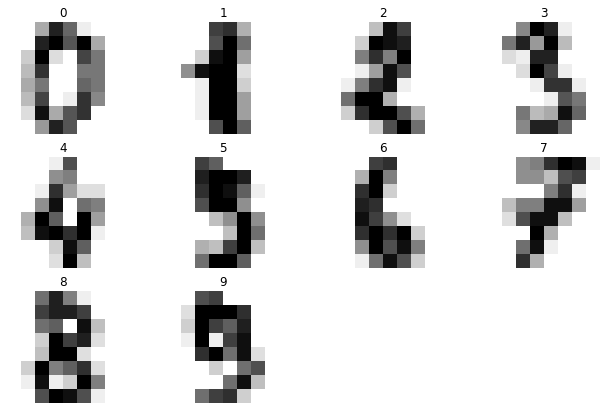

In [9]:
# Выводим первые 10 картинок в сетку 3x4
_, axes = plt.subplots(nrows=3, ncols=4, figsize=(11, 7))
for ax, image, label in zip(axes.flat, X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), 
              cmap=plt.cm.gray_r)
    ax.set_title(label)

    
# удаляем два последних вывода, т.е. пустые графики  
plt.delaxes(axes.flat[10])
plt.delaxes(axes.flat[11])

In [10]:
task.estimate(2, 1, "Хорошая работа!")

task_2  || 1.0 || Хорошая работа!


# 2. Кластеризация и оценка качества

Мы будем использовать два популярных алгоритма: иерархическую кластеризацию и метод $K$ средних ($K$-means clustering). Эти и другие алгоритмы кластеризации доступны в библиотеке scikit-learn в подмодуле `cluster`. Иерархическая кластеризация называется `AgglomerativeClustering`, а метод $K$ средних – `KMeans`.

Интерфейс у большинства алгоритмов в scikit-learn простой и единообразный:
- Чтобы инициализировать модель, нужно создать экземпляр соответствующего класса со всеми необходимыми параметрами. Например, у кластеризаций единственный обязательный параметр называется `n_clusters`, это количество кластеров, которое мы хотим получить на выходе.
- Инициализированную модель можно обучить, вызвав метод `fit`.
- С помощью обученной модели можно предсказывать, вызывая метод `predict`.

Как видно, этот интерфейс хорош только для задач обучения с учителем, в которых чётко разделены фазы обучения модели и предсказания с её помощью. У кластеризаций зато есть метод `fit_predict`, который разбивает входную выборку на кластеры и сразу же возвращает результаты разбиения.

**Task 3 (0.5 балла)** Используя каждый из двух методов, иерархическую кластеризацию и $K$ средних, получите разбиение массива `X` на 10 кластеров.

*Указания:*
- Оба раза должен получиться массив из 1797 чисел – номеров кластеров.
- `KMeans` делает несколько (по умолчанию 10) запусков со случайными центрами и из полученных разбиений выводит лучшее в терминах среднего внутрикластерного расстояния. Чтобы улучшить качество предсказаний, можно увеличить число запусков, например, до 100. Это параметр `n_init` в конструкторе.

In [11]:
# Импортируем необходимые алгоритмы
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [12]:
ac_clustering = AgglomerativeClustering(n_clusters=10).fit(X)

In [13]:
print("AgglomerativeClustering")
print("Количество номеров кластеров:", ac_clustering.labels_.shape)
print("Имена всех получившихся кластеров: ", np.unique(ac_clustering.labels_))

AgglomerativeClustering
Количество номеров кластеров: (1797,)
Имена всех получившихся кластеров:  [0 1 2 3 4 5 6 7 8 9]


In [14]:
km_clustering = KMeans(n_clusters=10,n_init=100, random_state=42).fit(X)

In [15]:
print("KMeans")
print("Количество номеров кластеров:", km_clustering.labels_.shape)
print("Имена всех получившихся кластеров: ", np.unique(km_clustering.labels_))

KMeans
Количество номеров кластеров: (1797,)
Имена всех получившихся кластеров:  [0 1 2 3 4 5 6 7 8 9]


In [16]:
task.estimate(3, 0.5, "Всё ок, оба раза получили нужное количетсво кластеров.")

task_3  || 0.5 || Всё ок, оба раза получили нужное количетсво кластеров.


--- 
**Task 4 (1 балл)** Визуализируйте центры кластеров, полученных каждым из двух способов. Это опять должны быть картинки на сетке 3 $\times$ 4 с белым фоном и тёмными контурами. Прокомментируйте: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?

*Указания:*
- Центр кластера – это среднее по всем наблюдениям, входящим в кластер, т. е. по какому-то набору строк из `X`.
- Чтобы выбрать наблюдения, входящие в кластер номер `i`, используйте индексацию по булевозначной маске. Саму маску можно получить из массива предсказанных номеров кластеров и числа `i` оператором `==`.
- Усреднять NumPy-массив вдоль какой-нибудь из осей умеет функция `np.mean`. Ознакомьтесь со справкой к ней. Нам нужно усреднение по строкам.

In [17]:
# Написал функцию для отрисовки центров кластеров для наших алгоритмов.
# Чтобы в бонусном задании использовать его же, придётся сделать его немножко вариативным по настройкам.

def plot_centers(centers, n_c=10, side=8, grid=[3,4]):
    '''
    centers (np.array):
        This np.array with centers info for plotting.
    n_c (int):
        Count of cluster. How much clusters we need plotting.
    side (int):
        This length in pixels for length to square image of digit.
    grid (list):
        This set grid for plotting.
    '''
    fig, ax = plt.subplots(*grid, figsize=(8, 8))

    for axi, center in zip(ax.flat, centers.reshape(n_c, side, side)):
        axi.set_axis_off()
        axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    
    for i in range(n_c, np.prod(grid)):
        fig.delaxes(ax.flat[i])

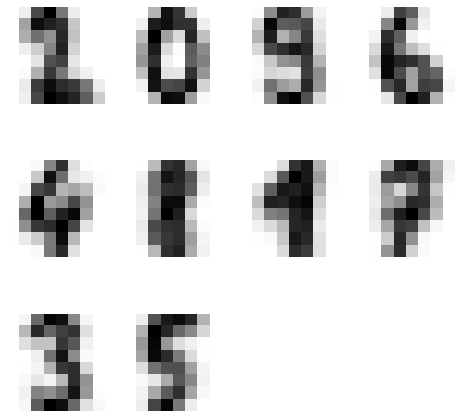

In [18]:
# Получаем центры для KMeans
km_centers = km_clustering.cluster_centers_

# и отрисовываем их при помощи созданной ранее функции
plot_centers(km_centers)

In [19]:
# В отличие от KMeans у  AgglomerativeClustering нет встроенного определителя центров кластеров.
# Пилим для этого дела свою функцию.
# По ходу дела оказалось что понадобятся сложные модификации, 
# в том числе и для  получения центров KMeans, в заданиях с уменьшением количества фич.

def get_centers(labels, data=X):

    centers = []
    for label in np.unique(labels):
        centers.append(np.mean(data[labels == label], axis=0))

    return np.array(centers)

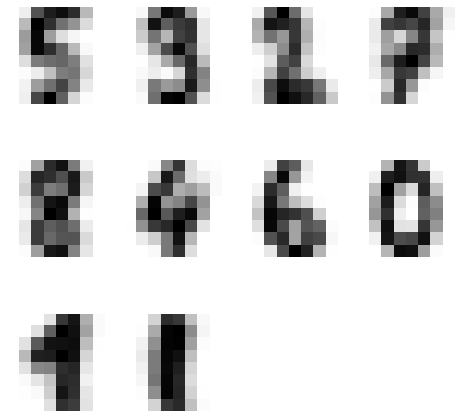

In [20]:
# Получаем центры для AgglimerativeClustering с помощью написанной ранее функции
ac_centers = get_centers(ac_clustering.labels_)

# Отрисовываем полученные центры
plot_centers(ac_centers)

Результаты получились немного отличающиеся. У KMeans хорошо читается 3 и 9, у его противника, неразобрать второй кластер, толи это 3 толи 9, я склоняюсь к 3ке, тогда в последнем кластере прячется совсем неразличимая 9ка. Зато AgglomerativeClustering довольно читаемо определил 8ку.

In [21]:
task.estimate(4, 1, "Центры отрисованы у двух алгоритмов, всё ок.")

task_4  || 1.0 || Центры отрисованы у двух алгоритмов, всё ок.


---
В ситуации, когда истинное число кластеров неизвестно, подбирают оптимальное число кластеров. При этом учитывают две величины: внутрикластерное расстояние (чем меньше, тем лучше) и межкластерное расстояние (чем больше, тем лучше). Так как две эти величины не достигают оптимума одновременно, обычно оптимизируют какой-нибудь функционал от них. Один популярный функционал называется "силуэт" (silhouette). Вот как он вычисляется.

Пусть $X$ – множество наблюдений, $M \subset X$ – один из кластеров, на которые оно разбито в результате кластеризации, $\rho$ – метрика на $X$. Выберем какое-нибудь одно наблюдение $x \in M$. Обозначим $a(x)$ среднее расстояние от $x$ до точек $x'$ из того же кластера:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Обозначим $b(x)$ минимум средних расстояний от $x$ до точек $x''$ из какого-нибудь другого кластера $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

Силуэт – это разность межкластерного и внутрикластерного расстояний, нормированная до отрезка $[-1,\, 1]$ и усреднённая по всем наблюдениям:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

В scikit-learn силуэт считается функцией `silhouette_score` из подмодуля `metrics`. На вход нужно передать массив наблюдений и результат кластеризации.

---
**Task 5 (1.5 балла)** Для числа $K$ от 2 до 20 включительно получите разбиение массива `X` на $K$ кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число $K$ – значение силуэта. При каком числе кластеров достигается максимум силуэта?

*Указания:*
- Не забудьте, что функция `range` не захватывает правый конец диапазона.
- Под значения силуэта можно завести два списка: один для иерархической кластеризации, другой для $K$ средних.
- Рисовать графики умеет функция `plt.plot`. Ознакомьтесь со справкой к ней.
- На одной картинке можно разместить несколько графиков, это просто несколько последовательных вызовов `plt.plot`.
- Чтобы добавить легенду (подписи к графикам), можно воспользоваться функцией `plt.legend`. Местоположение легенды контролируется параметром `loc`.
- Чтобы подписать координатные оси, можно воспользоваться функциями `plt.xlabel` и `plt.ylabel`.

In [22]:
# Импортируем нужную нам метрику "Силуэт"
from sklearn.metrics import silhouette_score

In [23]:
# Для более удобной настройки получения силуэтов обернул функцию получения метрики в отдельную функцию
# Теперь все настройки в одном месте!
def get_silhouette(X, labels):
    return silhouette_score(X, labels,  
                     metric='euclidean', 
                     sample_size=None, 
                     random_state=42)

In [24]:
# Мне больше понравилась идея использовать словари, нежели просто списки, 
# т.к. точно видно при каком количестве кластеров получен максимальный результат,
# без высчитывания индекса. 
km_silhouettes = {}
ac_silhouettes = {}

# так же сохраним полученные лэйблы для каждого количества кластеров
km_labels_s = {}
ac_labels_s = {}

for K in range(2, 21):
    
    ac_clustering = AgglomerativeClustering(n_clusters=K).fit(X)
    km_clustering = KMeans(n_clusters=K, n_init=100, random_state=42).fit(X)
    
    km_labels_s[K] = km_clustering.labels_
    ac_labels_s[K] = ac_clustering.labels_
    
    ac_silhouettes[K] = get_silhouette(X, ac_clustering.labels_)
    km_silhouettes[K] = get_silhouette(X, km_clustering.labels_)

In [25]:
# Да, похоже я люблю делать функции. 
# Это функция для получения ключа максимального значения в словаре. 
def get_key_max_val(dict_):
    return [*dict_.keys()][[*dict_.values()].index(max(dict_.values()))]

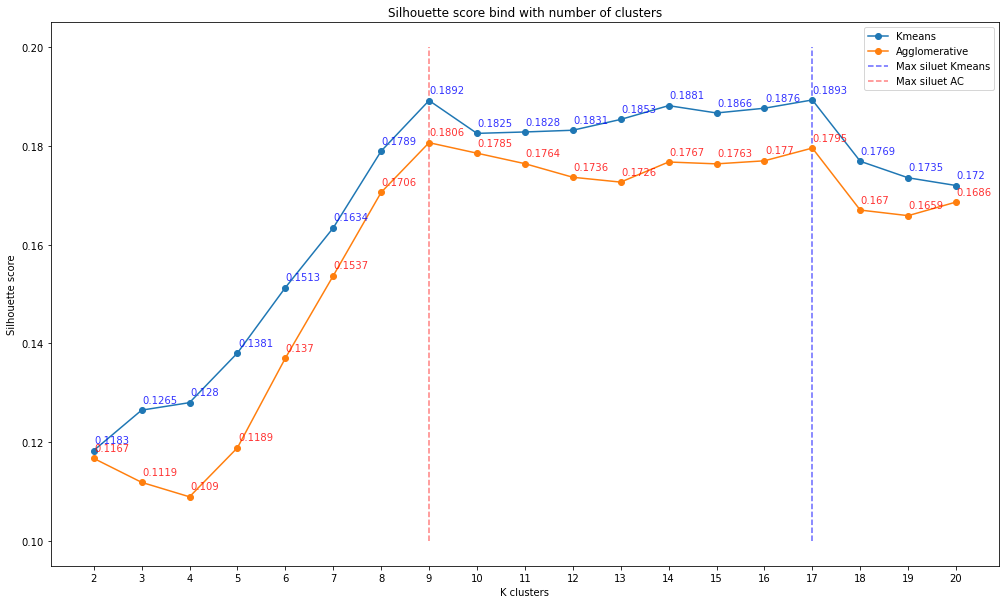

In [26]:
# Выведем результаты на тру график.
fig, ax = plt.subplots(figsize=(17, 10))
ax.plot(km_silhouettes.keys(), km_silhouettes.values(),
         ac_silhouettes.keys(), ac_silhouettes.values(), marker="o")

ax.vlines(x = get_key_max_val(km_silhouettes),
           ymin=.1, ymax=0.2, colors = 'blue', linestyles='dashed',
           alpha=0.6, label='Max siluet Kmeans')
ax.vlines(x = get_key_max_val(ac_silhouettes),
           ymin=.1, ymax=0.2, colors = 'red', linestyles='dashed',
           alpha=0.5, label='Max siluet AC')

plt.title("Silhouette score bind with number of clusters")
plt.legend(["Kmeans", "Agglomerative", 'Max siluet Kmeans', 'Max siluet AC']);
plt.xlabel("K clusters");
plt.ylabel("Silhouette score");
plt.xticks(range(2,21));

# Чтобы убрать спорные моменты надо вывести значения около самих точек
for i,j in zip(km_silhouettes.keys(), km_silhouettes.values()):
    ax.text(s=str(round(j, 4)), x=i +0.01, y = j+0.0015, c = "blue", alpha=0.8)
for i,j in zip(ac_silhouettes.keys(), ac_silhouettes.values()):
    ax.text(s=str(round(j, 4)), x=i +0.01, y = j+0.0015, c = "red",alpha=0.8)

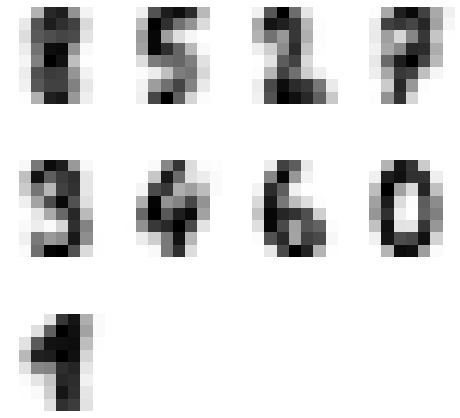

In [27]:
# Можно посмотреть на центры для лучшего количества кластеров набравшего максимальный силуэт 
# для AgglomerativeClustering

plot_centers(get_centers(ac_labels_s[9]), 9)

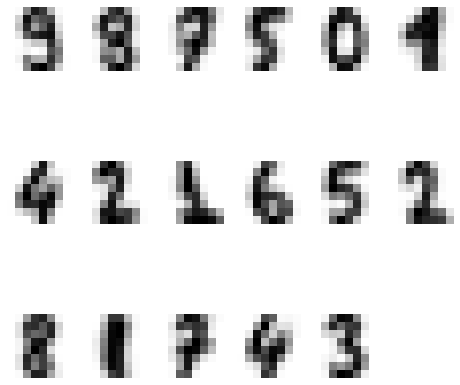

In [28]:
# Можно посмотреть на центры для лучшего количества кластеров набравшего максимальный силуэт
# для KMeans

plot_centers(get_centers(km_labels_s[17]), 17, grid=[3,6])

### Итоги
Как видно по вычисленному силуэту, и KMeans и AgglomerativeСlustering оба алгосчитают одним из лучших подбор 9 кластеров, думаю это связано с похожестью некоторых цифр (3 и 9, 5 и 6 и т.д.). Так же очень ненамного Kmeans набирает больший силуэт при 17 кластерах, это связанно, как мне кажется, с тем что некоторые цифры легче группируются за чёт большего количества кластеров, при этом некоторые изображенные цифры нечитабельны.  

In [29]:
task.estimate(5, 1.5, "Task complete.")

task_5  || 1.5 || Task complete.


---
Когда известно "правильное" (в каком-нибудь смысле) разбиение на кластеры, результат кластеризации можно сравнить с ним, используя такие меры, как однородность (homogeneity), полнота (completeness) и их среднее гармоническое – $V$-мера. Определения этих величин довольно громоздкие и основаны на понятии [энтропии распределения вероятностей](https://ru.wikipedia.org/wiki/Информационная_энтропия); подробности излагаются в [этой статье](http://aclweb.org/anthology/D/D07/D07-1043.pdf). На практике достаточно знать, что однородность, полнота и $V$-мера заключены между нулём и единицей – чем больше, тем лучше.

Так как мы знаем, какую цифру на самом деле изображает каждая картинка (это массив `y`), мы можем использовать однородность, полноту и $V$-меру для оценки качества кластеризации. Функции для вычисления этих величин доступны в scikit-learn, в подмодуле `metrics`, под названиями `homogeneity_score`, `completeness_score`, `v_measure_score`. Как вариант, можно использовать функцию `homogeneity_completeness_v_measure`, которая возвращает сразу тройку чисел.

**Task 6 (1 балл)** Повторите предыдущее задание, используя $V$-меру вместо силуэта. При каком числе кластеров достигается максимум $V$-меры?

In [30]:
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import v_measure_score

In [31]:
# всё по старой схеме
# Хранилище V-measure
km_v_measure = {}
ac_v_measure = {}

# Хранилище для получившихся лэйблов.
km_labels_vm = {}
ac_labels_vm = {}

for K in range(2, 21):
    ac_clustering = AgglomerativeClustering(n_clusters=K).fit(X)
    km_clustering = KMeans(n_clusters=K, n_init=100, random_state=42).fit(X)
    
    km_labels_vm[K] = km_clustering.labels_
    ac_labels_vm[K] = ac_clustering.labels_
    
    ac_v_measure[K] = v_measure_score(y, ac_clustering.labels_)
    km_v_measure[K] = v_measure_score(y, km_clustering.labels_)


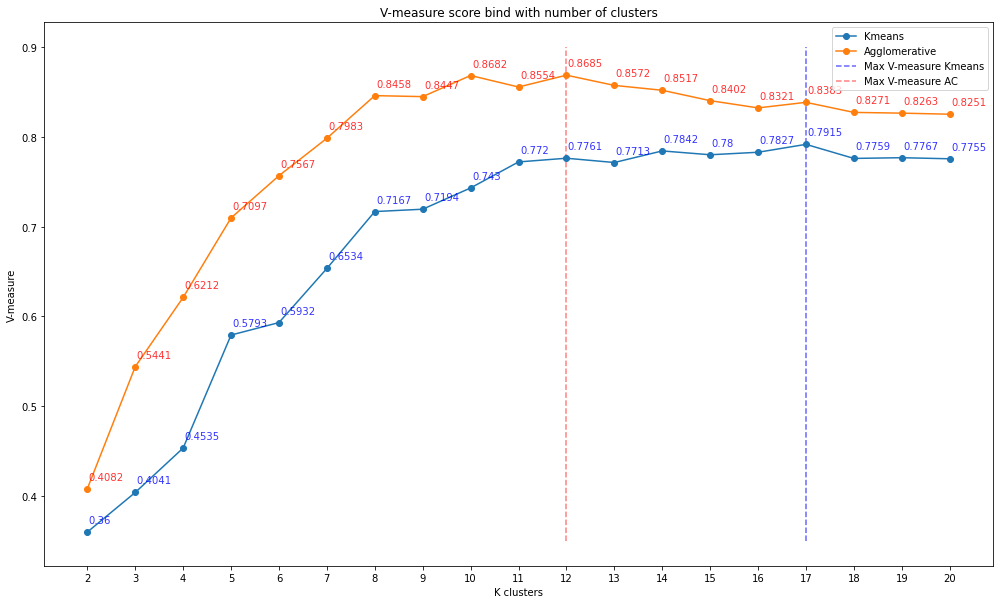

In [32]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.plot(km_v_measure.keys(), km_v_measure.values(),
         ac_v_measure.keys(), ac_v_measure.values(), marker="o")

ax.vlines(x = get_key_max_val(km_v_measure),
           ymin=.35, ymax=0.9, colors = 'blue', linestyles='dashed',
           alpha=0.6, label='Max V-measure Kmeans')
ax.vlines(x = get_key_max_val(ac_v_measure),
           ymin=.35, ymax=0.9, colors = 'red', linestyles='dashed',
           alpha=0.5, label='Max V-measure AC')


plt.title("V-measure score bind with number of clusters")
plt.legend(["Kmeans", "Agglomerative", 'Max V-measure Kmeans', 'Max V-measure AC']);
plt.xlabel("K clusters");
plt.ylabel("V-measure");
plt.xticks(range(2,21));


for i,j in zip(km_v_measure.keys(), km_v_measure.values()):
    ax.text(s=str(round(j, 4)), x=i +0.03, y = j+0.01, c = "blue", alpha=0.8)
for i,j in zip(ac_v_measure.keys(), ac_v_measure.values()):
    ax.text(s=str(round(j, 4)), x=i +0.03, y = j+0.01, c = "red",alpha=0.8)

### Итоги

Интересно, но у AgglomerativeClustering очевидно V-measure больше чем у KMeans на всех итерациях, хотя при измерении silhouette_score. В этот раз максимальные значения измерений были достигнуты у иерархической кластеризации при 12 кластерах, у KMeans всё так же при 17.

In [33]:
# Можно посмотреть на центры для лучшего количества кластеров набравшего максимальный силуэт 
# для AgglomerativeClustering

# plot_centers(get_centers(ac_labels_vm[12]), 12)

In [34]:
# Можно посмотреть на центры для лучшего количества кластеров набравшего максимальный силуэт
# для KMeans

# plot_centers(get_centers(km_labels_vm[17]), 17, grid=[3,6])

In [35]:
task.estimate(6, 1, "V-measure did finded")

task_6  || 1.0 || V-measure did finded


---

# 3. Снижение размерности признакового пространства

Иногда, особенно когда признаков много и не все они одинаково информативные, бывает полезно снизить размерность признакового пространства, то есть вместо $d$ исходных признаков перейти к рассмотрению $d' \ll d$ новых признаков. Данные были представлены матрицей $n$ наблюдений $\times$ $d$ исходных признаков, а теперь будут представлены матрицей $n$ наблюдений $\times$ $d'$ новых признаков.

Есть два популярных подхода к снижению размерности:
- отобрать (select) новые признаки из числа имеющихся;
- извлечь (extract) новые признаки, преобразуя старые, например, сделать $d'$ различных линейных комбинаций столбцов исходной матрицы $n \times d$.

Одним из широко используемых методов извлечения признаков является сингулярное разложение матрицы (singular value decomposition, SVD). Этот метод позволяет сконструировать любое число $d' \le d$ новых признаков таким образом, что они будут, в определённом смысле, максимально информативными. Математические детали сейчас не важны; познакомиться с ними можно, например, [здесь](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(по-русски) или [здесь](https://www.youtube.com/watch?v=P5mlg91as1c) (по-английски).

В scikit-learn есть несколько реализаций сингулярного разложения. Мы будем использовать класс `TruncatedSVD` из подмодуля `decomposition`. В конструктор этого класса достаточно передать один параметр `n_components` – желаемое число новых признаков. Метод `fit_transform` принимает матрицу и возвращает новую матрицу с таким же количеством строк, как прежде, и количеством столбцов, равным числу новых признаков.

<u>Замечание:</u> Сингулярное разложение матрицы $M$ обычно пишут в виде $M = U \Sigma V^{*}$, где $U$, $\Sigma$ и $V$ – некие матрицы с хорошими свойствами. То, что возвращает алгоритм `TruncatedSVD`, – это сколько-то (сколько мы хотим получить) первых столбцов матрицы $U$.

**Task 7 (1.5 балла)** Выполните сингулярное разложение матрицы `X`, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и $K$-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли при каком-нибудь $d'$ получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [36]:
from sklearn.decomposition import TruncatedSVD

In [37]:
km_silhouettes_svd = {}
ac_silhouettes_svd = {}

km_silhouettes_svd_X_ = {}
ac_silhouettes_svd_X_ = {}

km_v_measure_svd = {}
ac_v_measure_svd = {}

km_labels_svd = {}
ac_labels_svd = {}

for prop in [2,5,10,20]:
    svd = TruncatedSVD(n_components=prop, n_iter=10, random_state=42)
    X_ = svd.fit_transform(X)
    
    ac_clustering = AgglomerativeClustering(n_clusters=10).fit(X_)
    km_clustering = KMeans(n_clusters=10, n_init=50, random_state=42).fit(X_)
    
    km_labels_svd[prop] = km_clustering.labels_
    ac_labels_svd[prop] = ac_clustering.labels_
    
    ac_silhouettes_svd[prop] = get_silhouette(X, ac_clustering.labels_)
    km_silhouettes_svd[prop] = get_silhouette(X, km_clustering.labels_)
    
    ac_silhouettes_svd_X_[prop] = get_silhouette(X_, ac_clustering.labels_)
    km_silhouettes_svd_X_[prop] = get_silhouette(X_, km_clustering.labels_)
    
    ac_v_measure_svd[prop] = v_measure_score(y, ac_clustering.labels_)
    km_v_measure_svd[prop] = v_measure_score(y, km_clustering.labels_)

In [38]:
print("KMeans Siluet d' > d (SVD)  orig data ", max(km_silhouettes_svd.values()) > max(km_silhouettes.values()))
print("KMeans Siluet d' > d (SVD)  fit data  ", max(km_silhouettes_svd_X_.values()) > max(km_silhouettes.values()))
print("KMeans V-measure  d' > d (SVD)        ", max(km_v_measure_svd.values()) > max(km_v_measure.values()))
print("---"*10)
print("AC Siluet d' > d (SVD)   orig data    ", max(ac_silhouettes_svd.values()) > max(ac_silhouettes.values()))
print("AC Siluet d' > d (SVD)   fit dat      ", max(ac_silhouettes_svd_X_.values()) > max(ac_silhouettes.values()))
print("AC V-measure d' > d (SVD)             ", max(ac_v_measure_svd.values()) > max(ac_v_measure.values()))

KMeans Siluet d' > d (SVD)  orig data  False
KMeans Siluet d' > d (SVD)  fit data   True
KMeans V-measure  d' > d (SVD)         False
------------------------------
AC Siluet d' > d (SVD)   orig data     False
AC Siluet d' > d (SVD)   fit dat       True
AC V-measure d' > d (SVD)              False


**Как видно из сравнения полученных результатов, использование TruncatedSVD дало нам больший силуэт если мы его вычисляем из преобзованных данных. Поскольку мы в чате так и не определили какой подход верный, оставляю оба, но после отрисовки центров кластеров подтверждается теория, что использование фитованных данных для вычисления силуэта является некоректным т.к. результаты нечитабельные.**

In [39]:
def check_max_val_svd():
    print("Key of max val to km_silhouettes_svd:    ", get_key_max_val(km_silhouettes_svd))
    print("Key of max val to ac_silhouettes_svd:    ", get_key_max_val(ac_silhouettes_svd))
    print("-"*20)
    print("Key of max val to km_silhouettes_svd_X_: ", get_key_max_val(km_silhouettes_svd_X_))
    print("Key of max val to ac_silhouettes_svd_X_: ", get_key_max_val(ac_silhouettes_svd_X_))
    print("-"*20)
    print("Key of max val to km_v_measure_svd:      ", get_key_max_val(km_v_measure_svd))
    print("Key of max val to ac_v_measure_svd:      ", get_key_max_val(ac_v_measure_svd))
    
check_max_val_svd()

Key of max val to km_silhouettes_svd:     20
Key of max val to ac_silhouettes_svd:     10
--------------------
Key of max val to km_silhouettes_svd_X_:  2
Key of max val to ac_silhouettes_svd_X_:  2
--------------------
Key of max val to km_v_measure_svd:       20
Key of max val to ac_v_measure_svd:       10


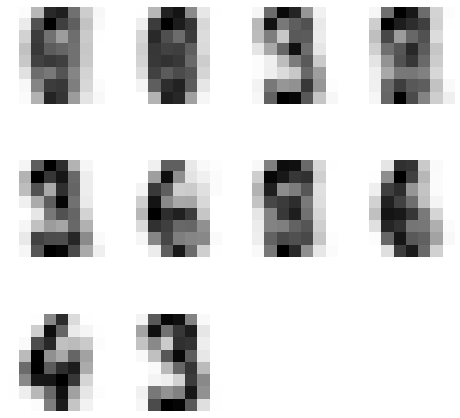

In [40]:
# Можно посмотреть на центры для лучшего разбивок для разных данных
# для AgglomerativeClustering

# plot_centers(get_centers(ac_labels_svd[10])) # лучший вариант для ac_silhouettes_svd и ac_v_measure_svd - получаются читаемые цифры
plot_centers(get_centers(ac_labels_svd[2]))  # лучший вариант для ac_silhouettes_svd_X_ - получается беее

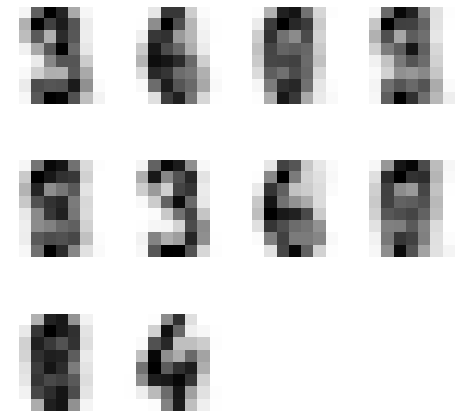

In [41]:
# Можно посмотреть на центры для лучшего количества кластеров набравшего максимальный силуэт
# для KMeans

plot_centers(get_centers(km_labels_svd[2]))  # лучший вариант для km_silhouettes_svd_X_ - получается беее, но лучше чем у ac
# plot_centers(get_centers(km_labels_svd[20])) # лучший вариант для km_silhouettes_svd  и km_v_measure_svd- получаются читаемые цифры, даже норм

In [42]:
task.estimate(7, 1.5, "Ок.")

task_7  || 1.5 || Ок.


---
Другая популярная техника снижения размерности, которая особенно хорошо подходит для работы с картинками, – это алгоритм t-distributed stochastic neighbor embeddings, сокращённо tSNE. В отличие от сингулярного разложения, это преобразование нелинейное. Его основная идея – отобразить точки из пространства размерности $d$ в пространство размерности 2 или 3 (обычно 2, то есть на плоскость) таким образом, чтобы как можно точнее сохранить расстояния. Математические детали есть, например, [здесь](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), но они нетривиальны.

В библиотеке scikit-learn реализацией tSNE является класс `TSNE` в подмодуле `manifold`. В конструктор можно передать параметр `n_components`, а можно и не передавать: по умолчанию он равен 2. Метод `fit_transform` работает аналогично тому, как и у `TruncatedSVD`.

<u>Замечание:</u> В последние годы вместо tSNE на практике часто используется [UMAP](https://github.com/lmcinnes/umap), более быстрый алгоритм с похожими свойствами. В этой лабораторной работе не предлагается использовать UMAP, так как это потребовало бы установить ещё одну зависимость -- библиотеку `umap-learn`. Желающие могут проделать задания на tSNE с использованием UMAP; в этом случае обратите внимание на параметры `n_neighbors` и `min_dist`, которыми определяется вид проекции.



**Task 8 (0.5 балла)** Выполните tSNE-преобразование матрицы `X`, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

*Указания:*
- Точечную диаграмму умеет рисовать функция `plt.scatter`. Ознакомьтесь со справкой к ней.
- За цвета точек отвечает параметр `c` у функции `plt.scatter`. Передать в него надо истинные метки классов.

In [43]:
from sklearn.manifold import TSNE

In [44]:
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)
X_embedded.shape

(1797, 2)

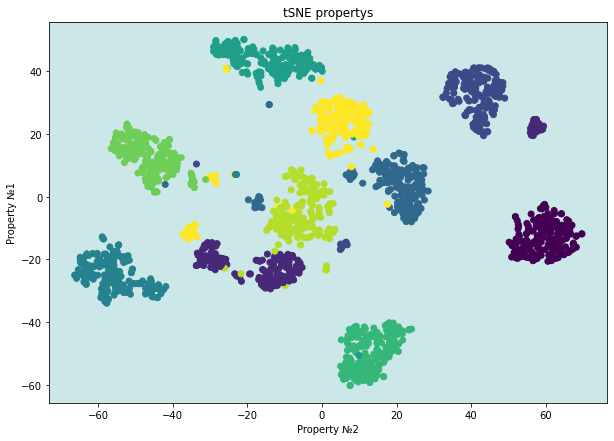

In [45]:
# np.random.seed(19680801)
fig, ax = plt.subplots(figsize=(10, 7))
plt.title("tSNE propertys")
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y, alpha=1)
plt.xlabel("Property №2")
plt.ylabel("Property №1")
ax.set_facecolor("darkcyan")
ax.patch.set_alpha(.2)

In [46]:
# Довольно быстро выполнимое задание с малым количеством кода.
task.estimate(8, 0.5)

task_8  || 0.5 || All right!


**Task 9 (1 балл)** Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и $K$-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [47]:
# check siluets and v-measure with tSNE data
ac_clustering = AgglomerativeClustering(n_clusters=10).fit(X_embedded)
km_clustering = KMeans(n_clusters=10, n_init=50, random_state=42).fit(X_embedded)

ac_silhouettes_tsne = get_silhouette(X, ac_clustering.labels_)
km_silhouettes_tsne = get_silhouette(X, km_clustering.labels_)

ac_v_measure_tsne = v_measure_score(y, ac_clustering.labels_)
km_v_measure_tsne = v_measure_score(y, km_clustering.labels_)

In [48]:
print("KMeans Siluet d' > d (tSNE)    ", km_silhouettes_tsne > max(km_silhouettes.values()))
print("KMeans V-measure  d' > d (tSNE)", km_v_measure_tsne > max(km_v_measure.values()))

print("AC Siluet d' > d (tSNE)        ", ac_silhouettes_tsne > max(ac_silhouettes.values()))
print("AC V-measure d' > d (tSNE)     ", ac_v_measure_tsne > max(ac_v_measure.values()))

KMeans Siluet d' > d (tSNE)     False
KMeans V-measure  d' > d (tSNE) True
AC Siluet d' > d (tSNE)         False
AC V-measure d' > d (tSNE)      True


In [49]:
print("{0:12} {1:1}".format("kn_siluets", "_"*11))
print("{0:12} {1:1}".format("simple", "with tSNE"))
print("{0:11}  {1:1} {2:2}".format("="*11, "="*11, ""))
print("{0:11}  {1:1} {2:2}".format(round(km_silhouettes_tsne, 9), 
                                  round(max(km_silhouettes.values()), 9) , ""))
print("{0:11}  {1:1} {2:2}".format(round(km_v_measure_tsne, 9), 
                                   round(max(km_v_measure.values()), 9), ""))

print("-"*24)
print("-"*24)
print("{0:12} {1:1}".format("AC_siluets", "_"*11))
print("{0:12} {1:1}".format("simple", "with tSNE"))
print("{0:10}  {1:1} {2:2}".format("="*11, "="*11, ""))

print("{0:11}  {1:1}".format(round(ac_silhouettes_tsne, 9), \
                           round(max(ac_silhouettes.values()), 9) ))
print("{0:11}  {1:1}".format(round(ac_v_measure_tsne, 9), \
                           round(max(ac_v_measure.values()), 9) ))

kn_siluets   ___________
simple       with tSNE
===========  ===========   
0.163607848  0.189265279   
0.910160839  0.791546233   
------------------------
------------------------
AC_siluets   ___________
simple       with tSNE
===========  ===========   
0.163529923  0.180619757
0.910370556  0.868548752


Как мы видим, tSNE дает лучший результат V-меры на KMeans и AgglomerativeClustering, чем на исходных данных. Но результат silhouettes не превышает исходных данных. Это нормально.

In [50]:
task.estimate(9, 1, "Это нормально.")

task_9  || 1.0 || Это нормально.


**Task 10 (0.5 балла)** Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или $V$-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

In [51]:
print("KMeans Siluet d' > d (SVD)    ", max(km_silhouettes_svd.values()) > max(km_silhouettes.values()))
print("KMeans V-measure  d' > d (SVD)", max(km_v_measure_svd.values()) > max(km_v_measure.values()))

print("AC Siluet d' > d (SVD)        ", max(ac_silhouettes_svd.values()) > max(ac_silhouettes.values()))
print("AC V-measure d' > d (SVD)     ", max(ac_v_measure_svd.values()) > max(ac_v_measure.values()))

print("---"*10)

print("KMeans Siluet d' > d (tSNE)    ", km_silhouettes_tsne > max(km_silhouettes.values()))
print("KMeans V-measure  d' > d (tSNE)", km_v_measure_tsne > max(km_v_measure.values()))

print("AC Siluet d' > d (tSNE)        ", ac_silhouettes_tsne > max(ac_silhouettes.values()))
print("AC V-measure d' > d (tSNE)     ", ac_v_measure_tsne > max(ac_v_measure.values()))

KMeans Siluet d' > d (SVD)     False
KMeans V-measure  d' > d (SVD) False
AC Siluet d' > d (SVD)         False
AC V-measure d' > d (SVD)      False
------------------------------
KMeans Siluet d' > d (tSNE)     False
KMeans V-measure  d' > d (tSNE) True
AC Siluet d' > d (tSNE)         False
AC V-measure d' > d (tSNE)      True


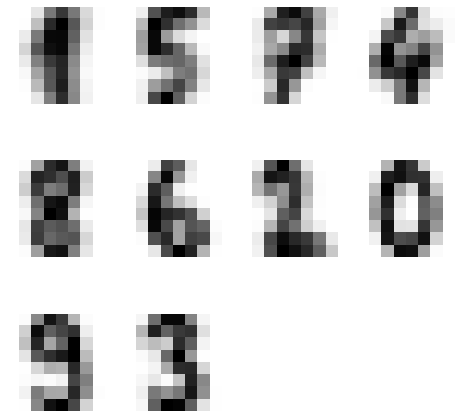

In [52]:
# Лучший результат V-меры достигается при 10 кластерах при tSNE
# Проверка как выглядят центры

ac_centers = get_centers(ac_clustering.labels_)    
plot_centers(ac_centers)

In [53]:
# kn_centers = get_centers(km_clustering.labels_ )
# plot_centers(kn_centers)

**Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?** 

Все цифры читаются во всех кластерах. 

In [54]:
task.estimate(10, 0.5)

task_10 || 0.5 || All right!


# 4. Итоги, бонус

**Task 11 (1 балл)** Напишите в свободной форме, какие выводы вы сделали из выполненной работы. Ответьте, как минимум, на следующие два вопроса:
- Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм $K$ средних? Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
- Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?

**Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм  𝐾  средних?**

На старте эксперимента оба метода дали одинаковый результат. 
Но по прошествии времени с использованными tSNE результаты удалось немного улучшить.

**Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?**

Критерии качества помогают выбрать лучшую модель, но в этом случае обе модели переходят на один уровень. 

**Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?**

Да, это правда. Оба алгоритма показали чуть лучший результат при использовании tSNE.

In [55]:
task.estimate(11, 1, "Hmm, so norm.")

task_11 || 1.0 || Hmm, so norm.


**Task 12 (Бонусные 2 балла)** Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Как сделать это с помощью scikit-learn, написано [здесь](http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository). MNIST Handwritten Digits – это 70 тысяч распознанных рукописных изображений цифр, каждое размером 28 $\times$ 28 пикселей. Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.

In [56]:

import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


Automatically created module for IPython interactive environment


In [57]:
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (70000, 784)
y.shape:  (70000,)


In [58]:
svd = TruncatedSVD(n_components=200, n_iter=1000, random_state=42)
   
X_svd = svd.fit_transform(X)

In [59]:
km_clustering_svd = KMeans(n_clusters=10, n_init=50, random_state=42).fit(X_svd)


In [60]:
km_v_measure_svd = v_measure_score(y, km_clustering_svd.labels_)

km_silhouettes_svd = get_silhouette(X, km_clustering_svd.labels_)
print("km_v_measure_svd", km_v_measure_svd)
print("km_silhouettes_svd", km_silhouettes_svd)

km_v_measure_svd 0.49931193444266103
km_silhouettes_svd 0.05872307739318241


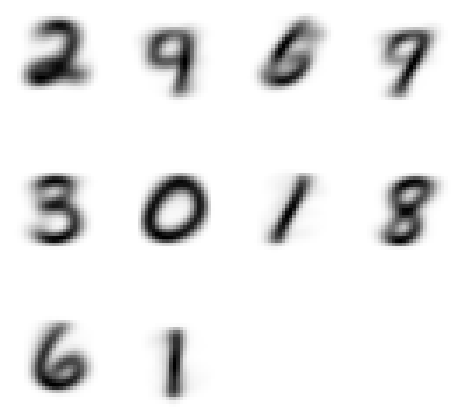

In [61]:
km_centers_svd = get_centers(km_clustering_svd.labels_, X)
plot_centers(km_centers_svd, side=28)

----

In [62]:
# пробуем найти лучшие кластеры с уменьшением размерности tSNE
X_tsne = TSNE(n_components=2, n_jobs=14).fit_transform(X)
X_tsne.shape

(70000, 2)

In [63]:
km_clustering_tsne = KMeans(n_clusters=10, n_init=2000, random_state=42).fit(X_tsne)

In [64]:
km_v_measure_tsne = v_measure_score(y, km_clustering_tsne.labels_)

km_silhouettes_tsne = get_silhouette(X, km_clustering_tsne.labels_)


In [65]:
print("km_v_measure_tsne", km_v_measure_tsne)
print("km_silhouettes_tsne", km_silhouettes_tsne)

km_v_measure_tsne 0.7368012524862
km_silhouettes_tsne 0.02753925502390061


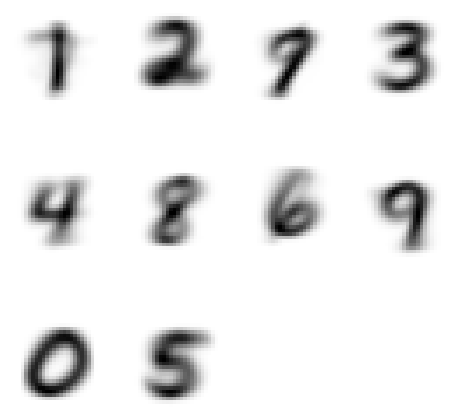

In [66]:
km_centers_tsne = get_centers(km_clustering_tsne.labels_, X )
plot_centers(km_centers_tsne, side=28)

In [67]:
X_tsne_3 = TSNE(n_components=3, n_jobs=14).fit_transform(X)
X_tsne_3.shape


(70000, 3)

In [68]:
km_clustering_tsne_3 = KMeans(n_clusters=10, n_init=1000, 
                              random_state=42).fit(X_tsne_3)

In [69]:
km_v_measure_tsne_3 = v_measure_score(y, km_clustering_tsne_3.labels_)
km_silhouettes_tsne_3 = get_silhouette(X, km_clustering_tsne_3.labels_)

In [70]:
print("km_v_measure_tsne_3", km_v_measure_tsne_3)
print("km_silhouettes_tsne_3", km_silhouettes_tsne_3)

km_v_measure_tsne_3 0.7103079949820604
km_silhouettes_tsne_3 0.03735413722116061


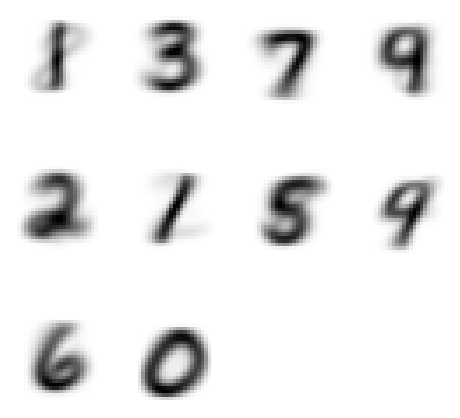

In [71]:
km_centers_tsne_3 = get_centers(km_clustering_tsne_3.labels_, X )
plot_centers(km_centers_tsne_3, side=28)

Из этих моделей мне удалось выбить лучшую V-меру с пмомощью KMeans в связке с tSNE (**0.77006**) К сожалению читаемости всех цифр добится не удалось, но и задачи такой не стояло. Задание считаю выполненным, но решил попробовать поиграться ещё с UMAP. Там можно выбить 0.84 и выше, если интересно можно открыть продолжение ноутбука на Google Colab.

### Другие эксперименты я продолжил с UMAP на платформе Google Colab. Т.к. установить umap на пк оказалось геморно.

[mnist_784__7_clustering__(@JackNightsky).ipynb   (Click me)](https://colab.research.google.com/drive/1WhZRKsvxMEifevMybmHvsGA1umwkPUF5?usp=sharing)

In [72]:
task.estimate(12, 2, "Зачёт.")

task_12 || 2.0 || Зачёт.


In [73]:
# Финальный подсчёт балов как я себя оцениваю
task.result()

task #        points   comment
============  =======  ============
task_1        || 0.5   || Всё ок!
task_2        || 1.0   || Хорошая работа!
task_3        || 0.5   || Всё ок, оба раза получили нужное количетсво кластеров.
task_4        || 1.0   || Центры отрисованы у двух алгоритмов, всё ок.
task_5        || 1.5   || Task complete.
task_6        || 1.0   || V-measure did finded
task_7        || 1.5   || Ок.
task_8        || 0.5   || All right!
task_9        || 1.0   || Это нормально.
task_10       || 0.5   || All right!
task_11       || 1.0   || Hmm, so norm.
task_12       || 2.0   || Зачёт.
TOTAL SCORE:  12.0
Score input in RS App: 120.0


# Пожалуйста не забывайте оставлять свои контакты, а так же комментарий в случае снижения оценки.

# Буду благодарен за варианты более оптимальных решений.